# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>

To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# **Data Task Definition**

From a data science perspective, the objective of identifying key drivers of used car prices translates into a supervised regression problem. The goal is to train a machine learning model using LinearRegression, Lasso or Ridge modelling alogorithms that predicts the continuous target variable—used car price—based on input features such as odometer, year, manufacturer, model, condition, title status, car type, and transmission. By analyzing the model's feature importance, we can quantitatively determine which factors most significantly influence pricing.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to Analyse Datasets

Here are the steps to get familiar with the dataset and identify any quality issues.

*   **Load the data:** Load the dataset into a pandas DataFrame. Eg. Read vehicles.csv files using pd.read_csv() command.
*   **Inspect the data:** Display the first few rows, the data types of each column, and the number of non-null values. Eg. df.head() or df.sample(50). Get the row count and columns using df.shape()
*   **Summarize numerical features:** Generate descriptive statistics for numerical columns to understand their distribution and potential outliers using df.describe().
* **Summarize categorical features:** Analyze the unique values and their counts for categorical columns to identify inconsistencies.Eg. get the value counts of all the column type as object.
* **Check for duplicate rows:** Identify and quantify any duplicate rows in the dataset. Eg. df.duplicated().sum(). Drop these duplicate rows.
* **Identify missing values:** Calculate and visualize the number/percentage of missing values per column. Eg. df.isnull().sum(). Need to analyze the pattern and decide if need to delete or impute missing values.
* **Data Consistency and Logical Checks:** For example, ensure year is not negative or greater than a reasonable maximum for a used car. Check that odometer is not zero for a used car, or that it aligns logically with the year.
* **Visualize data distributions:** Create visualizations like histograms or  box plots to understand the distribution of key features and identify potential issues.
* **Explore relationships between features:** Use scatter plots or, correlation matrices to visualize and identify relationships between features and the target variable price.
* **Document findings:** Summarize the key observations and potential data quality issues found during the exploration phase.
* **Finish task:** Summarize the findings to better inform the business understanding.

In [9]:
# Import required librarys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [10]:
os.makedirs('images', exist_ok=True)
os.makedirs('images/all', exist_ok=True)
os.makedirs('images/models', exist_ok=True)
np.set_printoptions(precision=4, suppress=True)

In [11]:
# Load and inspect Datasets
df = pd.read_csv('data/vehicles.csv')
print(f"Dimension of Dataframe is: \nRows --> {df.shape[0]} \nColumns --> {df.shape[1]}")
print("=" * 70)
print("\n")
df.info()
print("=" * 70)
print("\n")
display(df.sample(5))
print("\n")

Dimension of Dataframe is: 
Rows --> 426880 
Columns --> 18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null 

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
386344,7302644787,salt lake city,18750,2005.0,NaN,"GMC, Ford, Freightliner & More",NaN,NaN,diesel,161087.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ut
119080,7313332945,tampa bay area,5995,2008.0,bmw,528i,good,6 cylinders,gas,126000.0,clean,automatic,NaN,NaN,NaN,sedan,silver,fl
263893,7314766046,albany,23000,2016.0,gmc,terrain,like new,6 cylinders,gas,55000.0,clean,automatic,NaN,4wd,full-size,SUV,grey,ny
227328,7310820337,helena,32500,2019.0,subaru,wrx premium,like new,4 cylinders,gas,5202.0,clean,manual,NaN,4wd,mid-size,sedan,grey,mt
219568,7313948605,columbia / jeff city,12500,2007.0,pontiac,solstice,like new,4 cylinders,gas,29138.0,clean,manual,1G2MB35B87Y113220,rwd,compact,convertible,black,mo


In [12]:
# Summarize Numerical features
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [13]:
# Check duplicate data and remove all duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Percentage of duplicate rows: {df.duplicated().mean() * 100:.2f}%")
print(f"Total Duplicate rows: {duplicate_count}")
# Deleting duplicate rows
if duplicate_count > 0:
    df = df.drop_duplicates()

Percentage of duplicate rows: 0.00%
Total Duplicate rows: 0



--- Missing Value Analysis ---

Missing Values Count and Percentage per Column:

              Missing Count  Missing Percentage
size                 306361           71.767476
cylinders            177678           41.622470
condition            174104           40.785232
VIN                  161042           37.725356
drive                130567           30.586347
paint_color          130203           30.501078
type                  92858           21.752717
manufacturer          17646            4.133714
title_status           8242            1.930753
model                  5277            1.236179
odometer               4400            1.030735
fuel                   3013            0.705819
transmission           2556            0.598763
year                   1205            0.282281




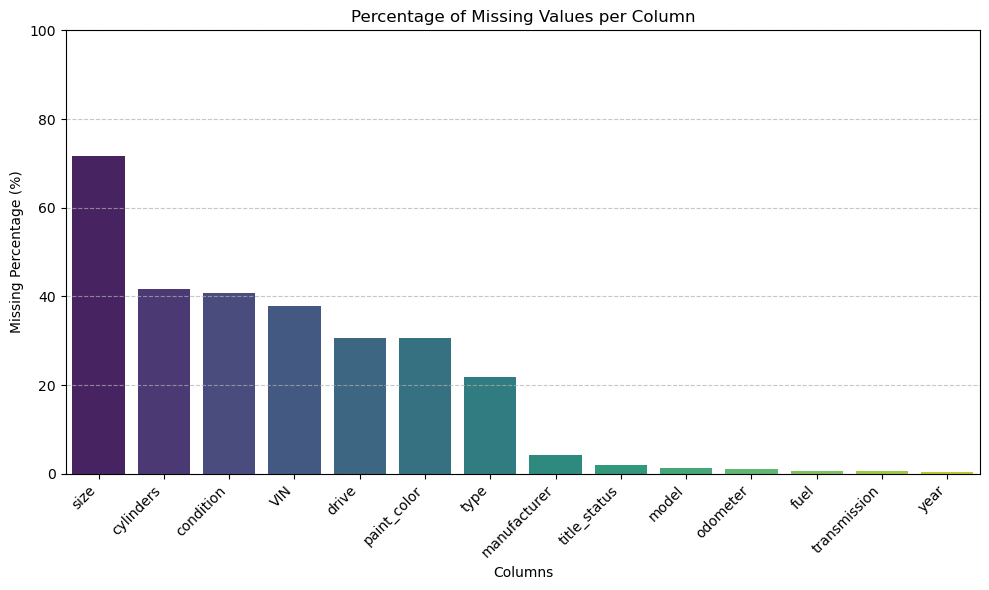

In [14]:
# Check missing values
print("\n--- Missing Value Analysis ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("\nMissing Values Count and Percentage per Column:\n")
print(missing_info)
print("=" * 70)
print("\n")
# Visualize missing values
if not missing_info.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_info.index, y=missing_info['Missing Percentage'], palette='viridis')
    plt.title('Percentage of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('images/all/missing_values_plot.png')
    plt.show()
else:
    print("\nNo missing values found in the dataset.")

In [15]:
# Summarize categorical features
print("\nSummary of categorical features:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    display(df[col].value_counts())


Summary of categorical features:

Column: region


region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64


Column: manufacturer


manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin


Column: model


model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64


Column: condition


condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


Column: cylinders


cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64


Column: fuel


fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64


Column: title_status


title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64


Column: transmission


transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64


Column: VIN


VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1GCEK19J78Z219711      1
JA4AT3AW1AZ006543      1
4T1BF28B61U153724      1
JTHCF5C25A5041393      1
SAJGX2749VCOO8376      1
Name: count, Length: 118246, dtype: int64


Column: drive


drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64


Column: size


size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64


Column: type


type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64


Column: paint_color


paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64


Column: state


state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

In [16]:
# Find unique values
print("\nSummary of Unique Values:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].nunique()}")
    print("-" * 30)



Summary of Unique Values:

Column: region
Unique values: 404
------------------------------

Column: manufacturer
Unique values: 42
------------------------------

Column: model
Unique values: 29649
------------------------------

Column: condition
Unique values: 6
------------------------------

Column: cylinders
Unique values: 8
------------------------------

Column: fuel
Unique values: 5
------------------------------

Column: title_status
Unique values: 6
------------------------------

Column: transmission
Unique values: 3
------------------------------

Column: VIN
Unique values: 118246
------------------------------

Column: drive
Unique values: 3
------------------------------

Column: size
Unique values: 4
------------------------------

Column: type
Unique values: 13
------------------------------

Column: paint_color
Unique values: 12
------------------------------

Column: state
Unique values: 51
------------------------------


**Data Consistency and Logical Checks**

In [18]:
# Check for years that are negative or unrealistically high
current_year = pd.to_datetime('now').year
print(f" Current Year: {current_year}\n")
print("=" * 70)
invalid_year_df = df[(df['year'] < 1920) | (df['year'] > current_year + 1)]
print(f"Rows with invalid year values (Year < 1920 or Year > {current_year}):\n")
display(invalid_year_df)
print("=" * 70)

# Check for odometer values that are zero for used cars
zero_odometer_df = df[df['odometer'] == 0]
print("\nRows with zero odometer values:")
display(zero_odometer_df)
print("=" * 70)
# Check for Cars older than 20 years with less than 1000 miles
unlikely_odometer_year_df = df[(df['year'] < current_year - 20) & (df['odometer'] < 1000)]
print("\nRows with unlikely odometer/year combinations:")
display(unlikely_odometer_year_df)
print("=" * 70)

# Price should never be zero or null
print("\nSummary of price values:")
print(df['price'].describe())
print("=" * 70)

# Check for rows with zero price
zero_price_df = df[df['price'] == 0]
print("\nRows with zero price values:")
display(zero_price_df)
print("=" * 70)


 Current Year: 2025

Rows with invalid year values (Year < 1920 or Year > 2025):



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
1698,7302752687,birmingham,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,al
10353,7316727942,phoenix,999,1901.0,NaN,ALL,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,az
26712,7313460223,fresno / madera,16000,1918.0,ford,model t,good,4 cylinders,gas,56000.0,clean,automatic,NaN,rwd,full-size,convertible,red,ca
29955,7316740981,inland empire,1,1900.0,NaN,All,fair,other,other,100000.0,clean,other,0,NaN,NaN,other,custom,ca
32544,7313782174,inland empire,1,1900.0,NaN,All,fair,other,other,100000.0,clean,other,0,NaN,NaN,other,custom,ca
42454,7315088892,orange county,38250,1900.0,acura,rdx,new,4 cylinders,gas,4500.0,clean,automatic,NaN,4wd,mid-size,SUV,silver,ca
44754,7311922008,palm springs,1,1900.0,NaN,All,good,other,other,1000.0,clean,other,0,NaN,NaN,other,custom,ca
54732,7316508257,san diego,85000,1913.0,cadillac,touring car,good,4 cylinders,gas,150.0,clean,manual,NaN,rwd,full-size,convertible,black,ca
58008,7309914809,san luis obispo,30000,1916.0,NaN,Scripps-Booth Model C,good,4 cylinders,gas,6008.0,clean,manual,NaN,NaN,compact,NaN,red,ca
83424,7302755836,eastern CT,0,1903.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,NaN,7275856000,NaN,NaN,other,NaN,ct



Rows with zero odometer values:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
538,7313640705,birmingham,0,2012.0,chevrolet,silverado 2500hd,NaN,8 cylinders,NaN,0.0,clean,automatic,1GC1CVCG6CF139696,rwd,NaN,NaN,white,al
563,7313475243,birmingham,0,2006.0,ford,f550,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,NaN,other,white,al
694,7311998372,birmingham,3980,2013.0,kia,rio,NaN,4 cylinders,gas,0.0,NaN,manual,KNADM4A30D6171594,fwd,NaN,sedan,white,al
889,7311103746,birmingham,0,2006.0,jeep,liberty,NaN,6 cylinders,gas,0.0,clean,automatic,1J8GL48K06W123802,4wd,NaN,SUV,red,al
985,7309937773,birmingham,0,2011.0,chevrolet,cruze,NaN,4 cylinders,gas,0.0,clean,automatic,1G1PJ5S98B7275266,rwd,NaN,sedan,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425904,7310130588,wausau,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,wi
425905,7310129006,wausau,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,wi
426002,7307585595,wausau,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,wi
426518,7310712349,wyoming,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,wy



Rows with unlikely odometer/year combinations:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
208,7316644188,birmingham,2500,1976.0,chevrolet,malibu classic,NaN,NaN,gas,100.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
1016,7309558028,birmingham,12500,1946.0,NaN,AutoCar flatbed truck,fair,6 cylinders,gas,123.0,missing,manual,906419252,NaN,NaN,NaN,NaN,al
1074,7308919338,birmingham,2500,1976.0,chevrolet,malibu classic,NaN,NaN,gas,100.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
1323,7306647155,birmingham,44650,1942.0,NaN,WILLYS MB,NaN,NaN,gas,30.0,clean,manual,NaN,NaN,NaN,convertible,NaN,al
2396,7310642600,gadsden-anniston,22500,1936.0,NaN,Nash,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424989,7307218587,milwaukee,1600,2004.0,chrysler,pacifica,NaN,NaN,gas,1.0,clean,automatic,2C8GM68414R633307,fwd,NaN,other,NaN,wi
425049,7315531037,northern WI,16500,1970.0,chevrolet,c 10,NaN,NaN,gas,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wi
426144,7304802467,wausau,26000,1969.0,chevrolet,c10,like new,8 cylinders,gas,909.0,clean,automatic,NaN,rwd,full-size,pickup,blue,wi
426302,7316462054,wyoming,125000,1957.0,chevrolet,resto mod,NaN,NaN,gas,480.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy



Summary of price values:
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Rows with zero price values:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


**Visualize data distributions:** Create visualizations like histograms or box plots to understand the distribution of key features and identify potential issues.

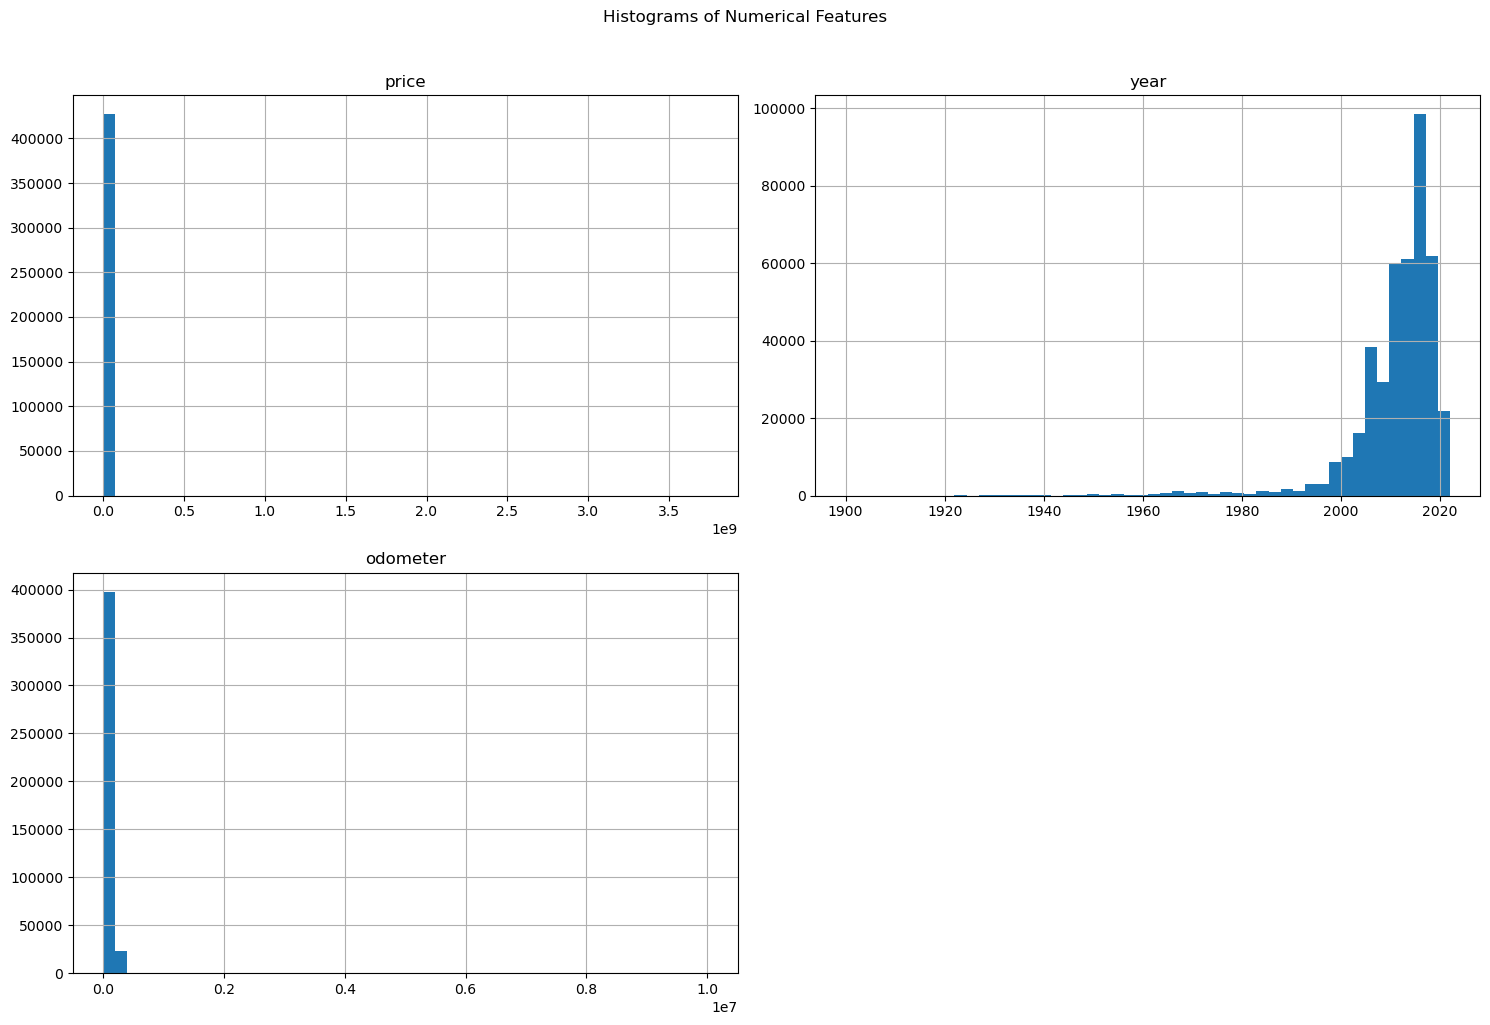

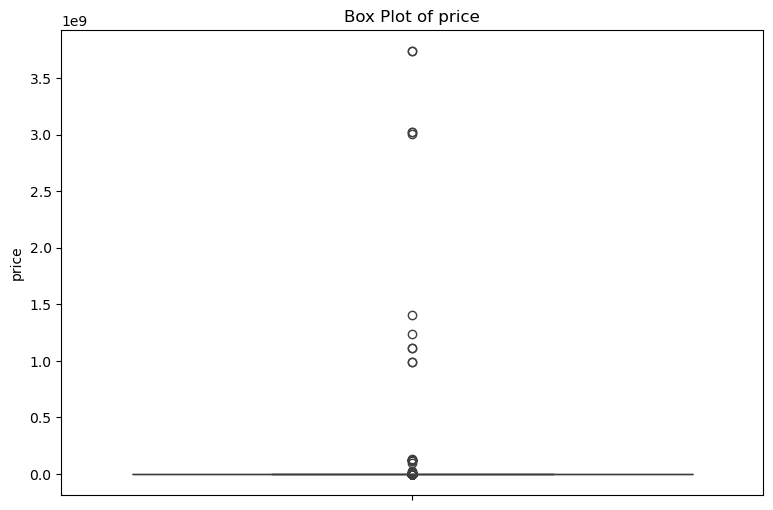

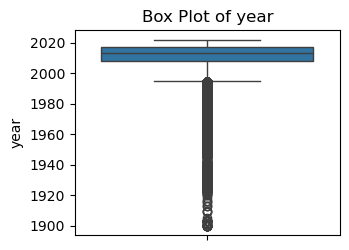

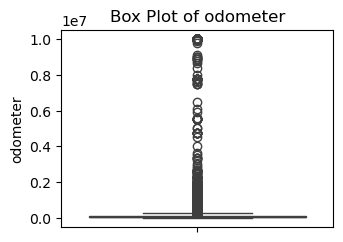

In [20]:
# Histograms
numerical_cols = ['price', 'year', 'odometer']
df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.savefig(f'images/all/histograms_num_features.png')
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    filename = f"box_plots_{col}_feature_.png.png"
    plt.savefig(f'images/all/{filename}')
    plt.show()

**Explore relationships between features:** Use scatter plots or, correlation matrices to visualize and identify relationships between features and the target variable price.

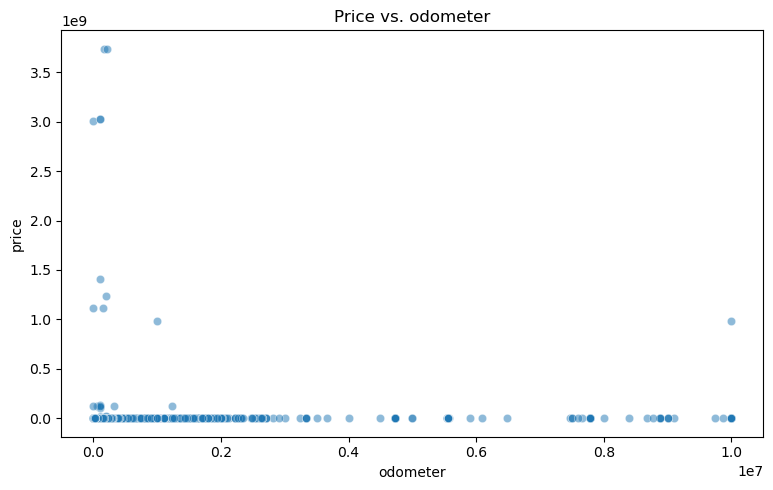

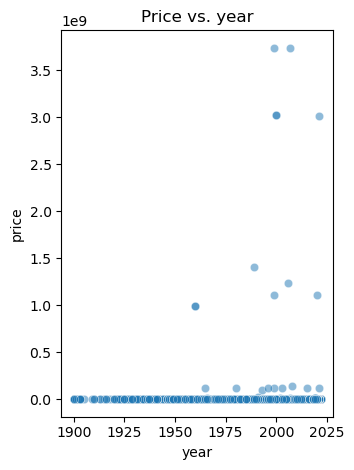

Correlation Matrix:
             price  odometer      year
price     1.000000  0.010032 -0.004925
odometer  0.010032  1.000000 -0.157215
year     -0.004925 -0.157215  1.000000


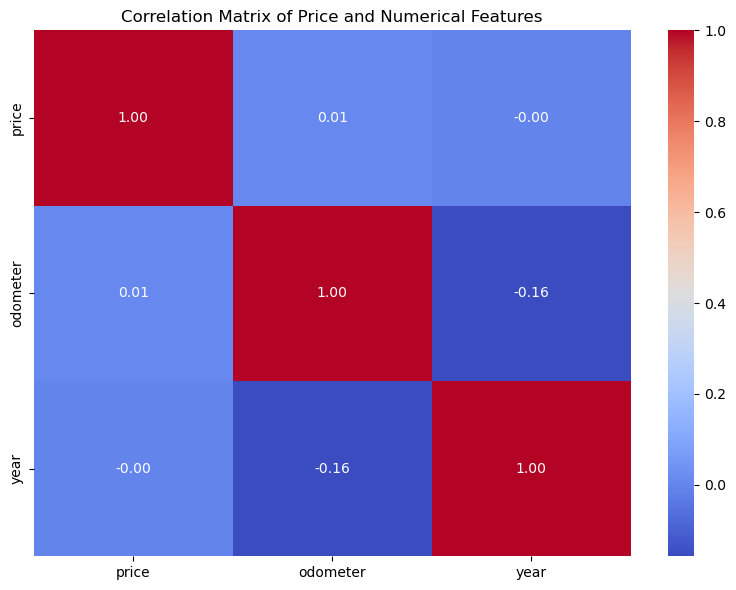

In [22]:
# Explore relationships between numerical features and price

# Scatter plots
# Exclude price itself for scatter plots against price
numerical_cols = ['odometer', 'year']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col, y='price', alpha=0.5)
    plt.title(f'Price vs. {col}')
    plt.tight_layout()
    plt.savefig(f'images/all/scatter_price_vs_{col}.png')
    plt.show()
print("=" * 70)

# Correlation matrix
correlation_matrix = df[['price'] + numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)
print("=" * 70)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price and Numerical Features')
plt.tight_layout()
plt.savefig(f'images/all/correlation_matrix.png')
plt.show()

**Document findings:** Summarize the key observations and potential data quality issues found during the exploration phase.

Key Observations:
* The dataset contains information on over 426,880 used cars with 18 columns.
* The price distribution is highly skewed to the right, indicating the presence of a few very expensive cars. The majority of cars are priced below $100,000, but there are some extreme outliers reaching billions.
* The year distribution shows a peak around recent years, with a tail extending back to older vehicles. There are no invalid negative or future years.
* The odometer distribution is also skewed, with a large number of cars having lower mileage and a tail extending to very high mileage. There are some vehicles with 0 mileage, which might require further investigation for used cars.
* Categorical features like region, manufacturer, and model have a high number of unique values, especially model and VIN. Features condition, cylinders, fuel, title_status, transmission, drive, size, type, and paint_color have a more manageable number of unique values.
* The correlation analysis shows a weak positive correlation between price and odometer, and a weak negative correlation between price and year. This suggests that newer cars and cars with lower mileage tend to be slightly more expensive, but these features alone are not strong predictors of price.

**Potential Data Quality Issues:**
* **Missing Values:** Several columns have a significant percentage of missing values, particularly size, cylinders, condition, VIN, drive, paint_color, and type. These missing values will need to be addressed during data preparation, potentially through imputation or removal of rows/columns, depending on the analysis.
* **Zero Price Values:** There are a substantial number of rows where the price is listed as 0. These entries are likely data errors or represent special cases (e.g., cars given away for free) and will need to be handled.
* **Zero Odometer Values:** There are some entries with 0 odometer readings, which is unusual for used cars and might indicate data entry errors or specific circumstances (e.g., recently replaced engines, although this is less likely for a large number of entries).
* **Unlikely Odometer/Year Combinations:** While not strictly errors, there are some cars with very old years but extremely low mileage (under 1000 miles for cars older than 20 years). These could be classic cars or have data issues and warrant further investigation.
* **Outliers in Price and Odometer:** The histograms and box plots clearly show outliers in both price and odometer. These outliers can significantly impact model training and may need to be transformed or removed.
* **High Cardinality in model and VIN:** The model and VIN columns have a very high number of unique values. VIN is likely a unique identifier and not useful as a direct feature for modeling. model will require careful handling, potentially through grouping or feature engineering, to be useful in a model.
* **Inconsistencies in Categorical Data:** While not explicitly checked for all columns, inconsistencies in capitalization or spelling within categorical columns could exist and would need cleaning.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

* **Check duplicated VIN numbers**   
  * Delete rows having duplicate VIN number
  * Delete rows having VIN number length less than mode value of VIN length
* **Drop Columns**
Drop features with a high percentage of missing values.

* **Convertion**
Convert feature **cylinders** to integer by stripping characters and spaces.
Also, combine state and region into a single column. This will reduce features in the model.

In [28]:
# VIN number of vehicle is always unique, check if data having duplicate VIN numbers.
before = len(df)
df = df.drop_duplicates(subset='VIN', keep='first')
dropped = before - len(df)
print(f"Dropped {dropped} duplicated VIN rows. Data shape is now: {df.shape}")
print("-" * 70)

# Drop rows with VINs that have a length less than the 'mode' length
before = len(df)
df['vin_length'] = df['VIN'].str.len()
mode_length = df['vin_length'].mode()[0]
df = df[df['vin_length'] == mode_length]
# Drop the temporary column from 'data' DataFrame
df = df.drop(columns=['vin_length'])
dropped = before - len(df)
print(f"Dropped {dropped} VIN rows due to invalid length. Data shape is now: {df.shape}")
print("-" * 70)

# Drop columns with high percentage of missing values
# Column Name        Missing Count    Missing Percentage
# size                 122707           71.473838
# VIN                  63380            36.917306

cols_to_drop = ['size', 'VIN']
df_cleaned = df.drop(columns=cols_to_drop)
print(f"Dropped VIN and size column due to hign missing percentage. Data shape is now: {df_cleaned.shape}")
print("-" * 70)

# Function to extract number from string. Return None for non-string values
def extract_number(text):
    if isinstance(text, str):
        try:
            return int(text.split(' ')[0])
        except ValueError:
            return None
    return None

# Apply the function to the 'cylinders' column to create 'encoded_cylinders'
df_cleaned['encoded_cylinders'] = df_cleaned['cylinders'].apply(extract_number)

# Display the first few rows with the new column to verify
print("DataFrame with 'encoded_cylinders' column:")
display(df_cleaned[['cylinders', 'encoded_cylinders']].sample(5))
print("-" * 70)

# Check the data type of the new column
print("\nData type of 'encoded_cylinders':")
print(df_cleaned['encoded_cylinders'].dtype)
print("-" * 70)

# Check value counts of the new column
print("\nValue counts of 'encoded_cylinders':")
display(df_cleaned['encoded_cylinders'].value_counts(dropna=False))
print("-" * 70)


Dropped 308633 duplicated VIN rows. Data shape is now: (118247, 18)
----------------------------------------------------------------------
Dropped 1022 VIN rows due to invalid length. Data shape is now: (117225, 18)
----------------------------------------------------------------------
Dropped VIN and size column due to hign missing percentage. Data shape is now: (117225, 16)
----------------------------------------------------------------------
DataFrame with 'encoded_cylinders' column:


,cylinders,encoded_cylinders
132224,4 cylinders,4.0
30598,4 cylinders,4.0
411219,8 cylinders,8.0
11532,NaN,NaN
132843,NaN,NaN


----------------------------------------------------------------------

Data type of 'encoded_cylinders':
float64
----------------------------------------------------------------------

Value counts of 'encoded_cylinders':


encoded_cylinders
NaN     48138
4.0     25992
6.0     25528
8.0     16453
5.0       541
10.0      307
3.0       211
12.0       55
Name: count, dtype: int64

----------------------------------------------------------------------


**Sanitize both Numeric and Category columns**

In [30]:
# Sanitize string columns in the DataFrame
def sanitize_string_columns(data):
    """
    Cleans all string (object) columns in the DataFrame by:
      - Converting all text to lower case.
      - Stripping leading and trailing whitespace.
      - Replacing * and ~ with a space.
      - Removing punctuation (except whitespace).
      - Replacing multiple consecutive whitespace characters with a single space.
      - Converting empty strings to NaN (missing values).
    """
    str_cols = data.select_dtypes(include='object').columns
    for col in str_cols:
        original_na = data[col].isna().sum()
        data[col] = (
            data[col].astype(str)
                .str.lower()
                # Replace * and ~ with space
                .str.replace(r'[\*~]+', ' ', regex=True)
                # Remove punctuation except whitespace
                .str.replace(r'[^\w\s]', '', regex=True)
                # Collapse multiple spaces
                .str.replace(r'\s+', ' ', regex=True)
                # Strip leading/trailing spaces
                .str.strip()
                .replace(['', 'nan', 'none'], np.nan)
        )
        new_na = data[col].isna().sum()
        print(f"Sanitized '{col}': {new_na - original_na} new NaN values introduced")

    print("Sanitized string columns:", list(str_cols))
    return data

def sanitize_numeric_columns(data):
    """
    Replace 0 values with np.nan in all numeric columns.
    Print the number of values sanitized for each column.
    """
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        num_zeros = (data[col] <  0).sum()
        data[col] = data[col].replace(0, np.nan)
        print(f"Sanitized '{col}': replaced {num_zeros} zero values with NaN")
    print("Sanitized numeric columns:", list(num_cols))
    return data

df_cleaned = sanitize_string_columns(df_cleaned)
df_cleaned = sanitize_numeric_columns(df_cleaned)
#df_cleaned.info()

Sanitized 'region': 0 new NaN values introduced
Sanitized 'manufacturer': 0 new NaN values introduced
Sanitized 'model': 3 new NaN values introduced
Sanitized 'condition': 0 new NaN values introduced
Sanitized 'cylinders': 0 new NaN values introduced
Sanitized 'fuel': 0 new NaN values introduced
Sanitized 'title_status': 0 new NaN values introduced
Sanitized 'transmission': 0 new NaN values introduced
Sanitized 'drive': 0 new NaN values introduced
Sanitized 'type': 0 new NaN values introduced
Sanitized 'paint_color': 0 new NaN values introduced
Sanitized 'state': 0 new NaN values introduced
Sanitized string columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Sanitized 'id': replaced 0 zero values with NaN
Sanitized 'price': replaced 0 zero values with NaN
Sanitized 'year': replaced 0 zero values with NaN
Sanitized 'odometer': replaced 0 zero values with NaN
Sanitized 'encoded_cylinders':

**Missing Value Strategy:**
Based on the missing value analysis, I will implement strategies to handle missing values in different columns. I will drop columns with a very high percentage of missing values and impute missing values for columns with a lower percentage.

In [32]:
# Impute missing values
# Numerical columns: Impute with median
numerical_cols_to_impute = ['price', 'odometer', 'year', 'encoded_cylinders']
for col in numerical_cols_to_impute:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Convert column year to int
df_cleaned['year'] = df_cleaned['year'].astype(int)
print(f"Data type of 'year' after conversion: {df_cleaned['year'].dtype}")
print(df_cleaned['year'].dtype)
print("-" * 70)
# Categorical columns: Impute with mode or 'unknown'
categorical_cols_to_impute = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
print(f"Mode {df_cleaned[categorical_cols_to_impute].mode()}\n")
for col in categorical_cols_to_impute:
    # Check if mode is a valid strategy (handle cases with no non-null values)
    if not df_cleaned[col].mode().empty:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna('unknown', inplace=True)


# Verify missing values are handled
print("-" * 70)
print("\n--- Missing Value Analysis After Handling ---")
print(df_cleaned.isnull().sum())

Data type of 'year' after conversion: int64
int64
----------------------------------------------------------------------
Mode   manufacturer model  condition    cylinders fuel title_status transmission  \
0         ford  f150  excellent  4 cylinders  gas        clean    automatic   

  drive   type paint_color  
0   4wd  sedan       white  

----------------------------------------------------------------------

--- Missing Value Analysis After Handling ---
id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
type                 0
paint_color          0
state                0
encoded_cylinders    0
dtype: int64


**Handle zero price and odometer values**
Investigate and decide how to handle rows where the price is 0 or the odometer is 0 or year is 0. These might need to be removed or treated as a separate category if they represent a distinct type of listing.

In [34]:
# Identify and count rows with zero price
zero_price_count = df_cleaned[df_cleaned['price'] == 0].shape[0]
print("=" * 70)
print(f"Number of rows with price = 0: {zero_price_count}")
print("=" * 70)

# Identify and count rows with zero odometer
zero_odometer_count = df_cleaned[df_cleaned['odometer'] == 0].shape[0]
print(f"Number of rows with odometer = 0: {zero_odometer_count}")
print("=" * 70)

# Identify and count rows with zero year
zero_year_count = df_cleaned[df_cleaned['year'] == 0].shape[0]
print(f"Number of rows with year = 0: {zero_year_count}")
print("=" * 70)

df_cleaned.describe()

Number of rows with price = 0: 0
Number of rows with odometer = 0: 0
Number of rows with year = 0: 0


,id,price,year,odometer,encoded_cylinders
count,1.172250e+05,1.172250e+05,117225.000000,1.172250e+05,117225.000000
mean,7.312180e+09,1.940887e+04,2012.986641,9.030207e+04,5.840529
std,4.233150e+06,3.614228e+05,5.498434,7.616903e+04,1.225771
min,7.301584e+09,1.000000e+00,1905.000000,1.000000e+00,3.000000
25%,7.309407e+09,8.995000e+03,2010.000000,4.165800e+04,6.000000
50%,7.313623e+09,1.499500e+04,2014.000000,8.505050e+04,6.000000
75%,7.315629e+09,2.397500e+04,2017.000000,1.262340e+05,6.000000
max,7.317099e+09,1.234568e+08,2022.000000,9.999999e+06,12.000000


In [35]:
# Remove rows where price is 0
df_cleaned = df_cleaned[df_cleaned['price'] > 0]

# Remove rows where odometer is 0
df_cleaned = df_cleaned[df_cleaned['odometer'] > 0]

# Remove rows where year is 0
df_cleaned = df_cleaned[df_cleaned['year'] > 0]

# Verify that zero price and odometer rows have been removed
print("\n--- Verification After Removing Zero Values ---")
print(f"Minimum price in cleaned DataFrame: {df_cleaned['price'].min()}")
print(f"Minimum odometer in cleaned DataFrame: {df_cleaned['odometer'].min()}")
print(f"Minimum year in cleaned DataFrame: {df_cleaned['year'].min()}")


--- Verification After Removing Zero Values ---
Minimum price in cleaned DataFrame: 1.0
Minimum odometer in cleaned DataFrame: 1.0
Minimum year in cleaned DataFrame: 1905


**Handle outliers**
Address the outliers in the price, year and odometer columns, potentially using transformations (e.g., log transformation) or capping/removing extreme values.
Visualize the distributions of 'price', year and 'odometer' after handling zero values to assess the need for transformation and then apply log transformations to both columns to address outliers, creating new log-transformed columns. Finally, visualize the distributions of the log-transformed columns to evaluate the effect of the transformation.

## Remove Outliers

### Subtask:
Identify and remove outliers from the 'price' and 'odometer' columns.

**Reasoning**:
Remove outliers using the IQR method to potentially improve model performance and reduce the impact of extreme values.

In [39]:
# Remove outliers using IQR for 'price' and 'odometer'
def remove_outliers_iqr(df, column):
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    removed_count = len(df) - len(df_cleaned_filtered)
    print(f"Removed {removed_count} outliers from '{column}' using IQR.")
    return df_cleaned_filtered

# Apply outlier removal to 'price' and then 'odometer'
print("Removing outliers from 'price' and 'odometer' columns...")
df_cleaned_filtered = remove_outliers_iqr(df_cleaned, 'price')
df_outliers_removed = remove_outliers_iqr(df_cleaned_filtered, 'odometer')

print(f"\nShape of DataFrame after removing outliers: {df_cleaned_filtered.shape}")


Removing outliers from 'price' and 'odometer' columns...
Removed 4873 outliers from 'price' using IQR.
Removed 1017 outliers from 'odometer' using IQR.

Shape of DataFrame after removing outliers: (112352, 17)


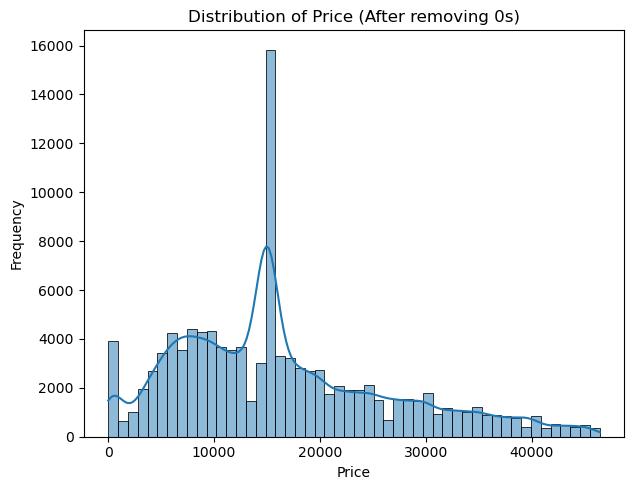

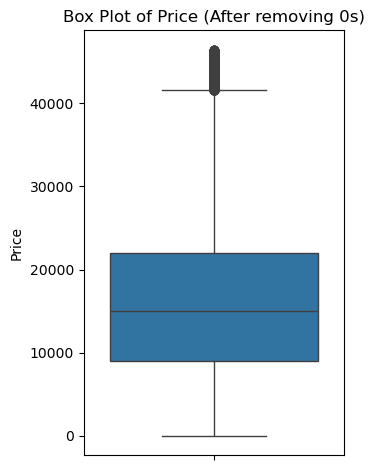

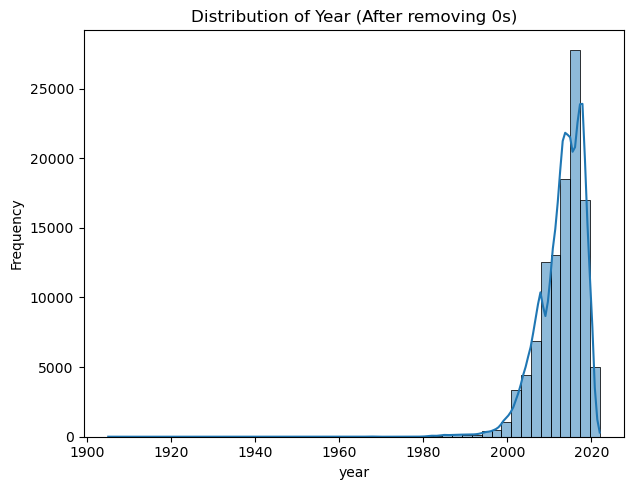

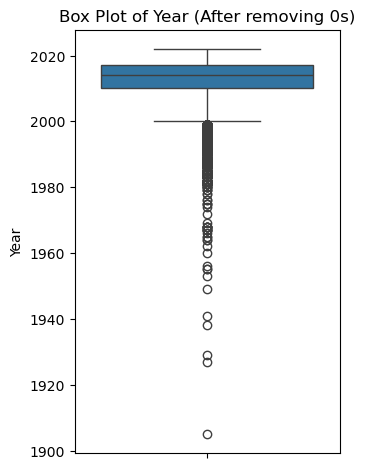

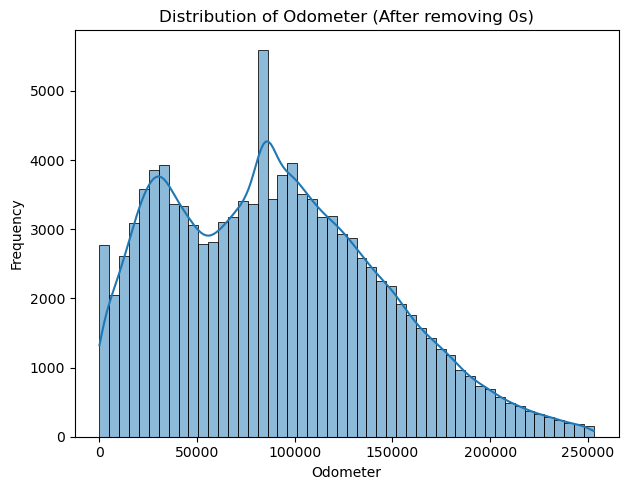

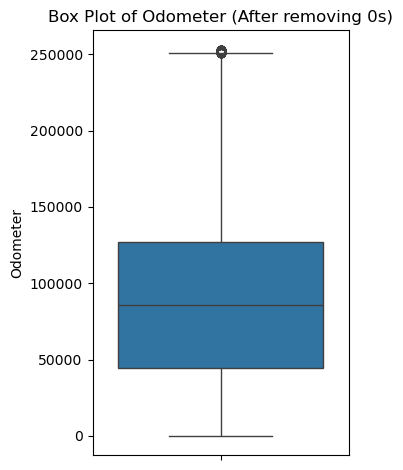

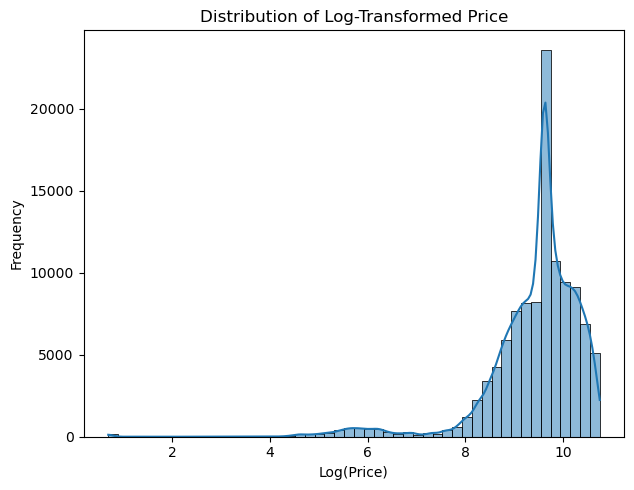

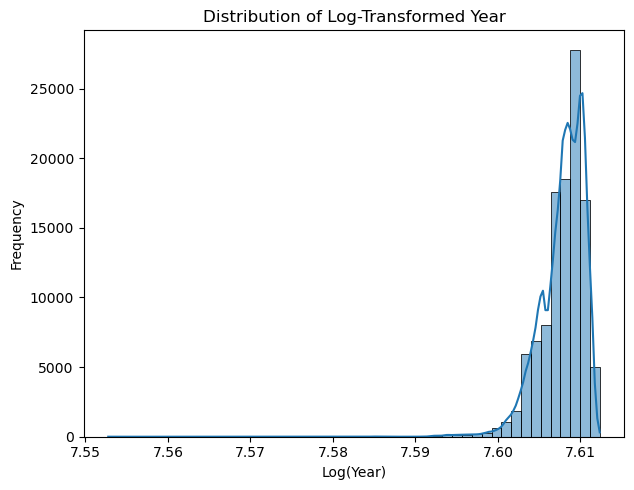

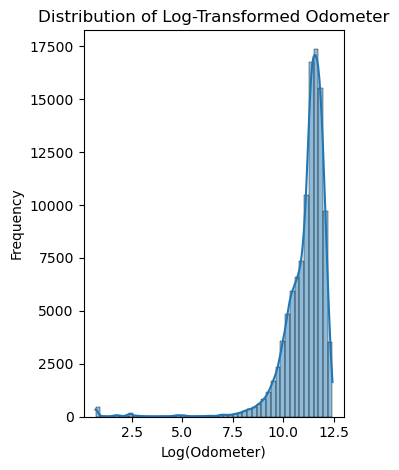

In [40]:
# Visualize the distribution of 'price' after handling zero values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_outliers_removed['price'], bins=50, kde=True)
plt.title('Distribution of Price (After removing 0s)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'images/all/hist_price_after_removing_zeros.png')
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(y=df_outliers_removed['price'])
plt.title('Box Plot of Price (After removing 0s)')
plt.ylabel('Price')
plt.tight_layout()
plt.savefig(f'images/all/box_plot_price_after_removing_zeros.png')
plt.show()

# Apply log transformation to 'price'
df_outliers_removed['price_log'] = np.log1p(df_outliers_removed['price'])

# Visualize the distribution of 'year' after handling zero values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_outliers_removed['year'], bins=50, kde=True)
plt.title('Distribution of Year (After removing 0s)')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'images/all/hist_year_after_removing_zeros.png')
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(y=df_outliers_removed['year'])
plt.title('Box Plot of Year (After removing 0s)')
plt.ylabel('Year')
plt.tight_layout()
plt.savefig(f'images/all/box_plot_year_after_removing_zeros.png')
plt.show()

# Apply log transformation to 'odometer'
df_outliers_removed['year_log'] = np.log1p(df_outliers_removed['year'])

# Visualize the distribution of 'odometer' after handling zero values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_outliers_removed['odometer'], bins=50, kde=True)
plt.title('Distribution of Odometer (After removing 0s)')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'images/all/hist_odometer_after_removing_zeros.png')
plt.show()

plt.subplot(1, 2, 2)
sns.boxplot(y=df_outliers_removed['odometer'])
plt.title('Box Plot of Odometer (After removing 0s)')
plt.ylabel('Odometer')
plt.tight_layout()
plt.savefig(f'images/all/box_plot_odometer_after_removing_zeros.png')
plt.show()

# Apply log transformation to 'odometer'
df_outliers_removed['odometer_log'] = np.log1p(df_outliers_removed['odometer'])

# Visualize the distributions of log-transformed columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_outliers_removed['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'images/all/hist_price_log_after_removing_zeros.png')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_outliers_removed['year_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Year')
plt.xlabel('Log(Year)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'images/all/hist_year_log_after_removing_zeros.png')
plt.show()

plt.subplot(1, 2, 2)
sns.histplot(df_outliers_removed['odometer_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Odometer')
plt.xlabel('Log(Odometer)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'images/all/hist_odometer_log_after_removing_zeros.png')
plt.show()

**Address high cardinality categorical features**
Decide how to handle columns like model with a large number of unique values. VIN might be dropped, while model could be grouped or used in a way that doesn't explode the feature space.
Examine the unique value counts of the 'model' column, determine a threshold for grouping, create a new grouped column, and verify the grouping by printing value counts. Also, confirm the 'VIN' column was dropped.

In [42]:
# Examine the unique value counts of the 'model' column
model_counts = df_outliers_removed['model'].value_counts()
print("=" * 70)
print("Original model value counts:")
display(model_counts)
print("=" * 70)

# Determine a threshold for grouping (e.g., models appearing less than 50 times)
threshold = 50
models_to_group = model_counts[model_counts < threshold].index

# Create a new column with grouped models
df_outliers_removed['model_grouped'] = df_outliers_removed['model'].apply(lambda x: 'Other' if x in models_to_group else x)

# Verify the grouping by printing value counts of the new column
print(f"\nModel value counts after grouping models with less than {threshold} occurrences:")
display(df_outliers_removed['model_grouped'].value_counts())
print("=" * 70)

# Confirm that the 'VIN' column was dropped
print("\nColumns in the cleaned DataFrame:")
print(df_outliers_removed.columns)
print("=" * 70)

if 'VIN' not in df_outliers_removed.columns:
    print("\n'VIN' column was successfully dropped.")
else:
    print("\n'VIN' column was NOT dropped.")

Original model value counts:


model
f150                              3256
silverado 1500                    1495
1500                              1236
escape                            1038
camry                             1036
                                  ... 
mazda6 4dr sdn auto i tou            1
330e iperformance                    1
f150 xlt 2wd supercab 65             1
tlx 35l fwd waspec pkg               1
thunder creek fuel trailer mt2       1
Name: count, Length: 15518, dtype: int64


Model value counts after grouping models with less than 50 occurrences:


model_grouped
Other                   46625
f150                     3256
silverado 1500           1495
1500                     1236
escape                   1038
                        ...  
crv lx                     51
camry hybrid               51
vibe                       51
forester 25i premium       50
sentra sv                  50
Name: count, Length: 307, dtype: int64


Columns in the cleaned DataFrame:
Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state', 'encoded_cylinders',
       'price_log', 'year_log', 'odometer_log', 'model_grouped'],
      dtype='object')

'VIN' column was successfully dropped.


Create new features that might be relevant for predicting car prices (e.g., age of the car from the year, creating dummy variables for categorical features).
Calculate car age, identify categorical columns, create dummy variables, concatenate features, and display the result.

In [45]:
# Calculate the age of the car
current_year = pd.to_datetime('now').year
df_outliers_removed['car_age'] = current_year - df_outliers_removed['year']
print("=" * 70)
print(df_outliers_removed.shape)
print("=" * 70)

# Identify categorical columns excluding target and numerical
categorical_cols = df_outliers_removed.select_dtypes(include='object').columns.tolist()

# For simplicity, keep 'model_grouped' and remove the original 'model', 'region', and 'state' for one-hot encoding in this example.

cols_to_exclude_from_dummy = ['model']
categorical_cols = [col for col in categorical_cols if col not in cols_to_exclude_from_dummy]


# Create dummy variables for categorical columns
df_dummies = pd.get_dummies(df_outliers_removed[categorical_cols], drop_first=True)

# Identify numerical columns (including log-transformed and car_age)
numerical_cols = ['price_log', 'odometer_log', 'car_age', 'encoded_cylinders']

# Concatenate numerical and dummy variables
df_processed = pd.concat([df_outliers_removed[numerical_cols], df_dummies], axis=1)

# Display few rows and the shape of the resulting DataFrame
print("\nProcessed DataFrame with new features:")
display(df_processed.sample(10))
print("=" * 70)
print(f"\nShape of the processed DataFrame: {df_processed.shape}")

(111335, 22)

Processed DataFrame with new features:


,price_log,odometer_log,car_age,encoded_cylinders,region_akron canton,region_albany,region_albuquerque,region_altoonajohnstown,region_amarillo,region_ames,...,model_grouped_xc60,model_grouped_xc90,model_grouped_xt5,model_grouped_xterra,model_grouped_xts,model_grouped_xv crosstrek,model_grouped_yaris,model_grouped_yukon,model_grouped_yukon denali,model_grouped_yukon xl
77266,9.851720,11.234216,12,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
128192,9.851720,11.289269,15,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
384465,10.043076,11.018941,7,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
306955,8.974745,11.489237,9,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
274603,9.615539,10.297521,7,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47456,9.851984,11.465215,10,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
326001,6.230481,10.724170,8,8.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
250648,9.615739,10.629949,6,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90238,9.210340,11.844005,16,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287734,8.922792,11.414585,17,6.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Shape of the processed DataFrame: (111335, 847)


In [46]:
# Visualize the final state of all missing values and correlations with the processed data
print(f"Dataset shape: {df_processed.shape[0]} rows, {df_processed.shape[1]} columns")
print("-" * 70)

print("\n--- Missing Value Analysis ---")
missing_values = df_processed.isnull().sum()
missing_percentage = (df_processed.isnull().sum() / len(df_processed)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("\nMissing Values Count and Percentage per Column:")
print(missing_info)
print("=" * 70)

# Visualize missing values
if not missing_info.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_info.index, y=missing_info['Missing Percentage'], palette='viridis')
    plt.title('Percentage of Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset.")

print("-" * 70)
df_processed.describe()

Dataset shape: 111335 rows, 847 columns
----------------------------------------------------------------------

--- Missing Value Analysis ---

Missing Values Count and Percentage per Column:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

No missing values found in the dataset.
----------------------------------------------------------------------


,price_log,odometer_log,car_age,encoded_cylinders
count,111335.000000,111335.000000,111335.000000,111335.000000
mean,9.413328,11.060188,12.137495,5.799623
std,1.001536,1.274141,5.421515,1.218546
min,0.693147,0.693147,3.000000,3.000000
25%,9.099521,10.700082,8.000000,6.000000
50%,9.615539,11.358795,11.000000,6.000000
75%,9.998616,11.750678,15.000000,6.000000
max,10.745981,12.441382,120.000000,12.000000


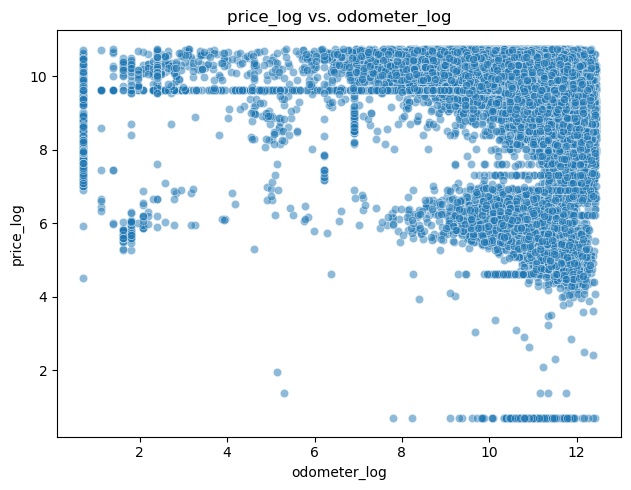

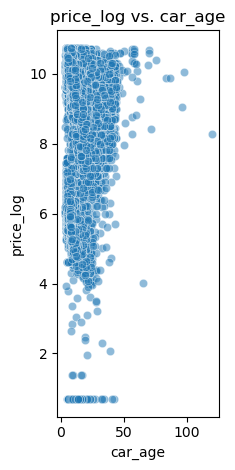

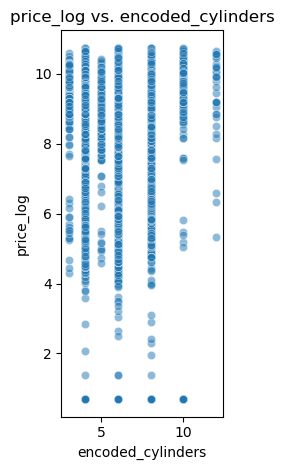

                   price_log  odometer_log   car_age  encoded_cylinders
price_log           1.000000     -0.138863 -0.325189           0.168311
odometer_log       -0.138863      1.000000  0.384256           0.049081
car_age            -0.325189      0.384256  1.000000           0.130658
encoded_cylinders   0.168311      0.049081  0.130658           1.000000


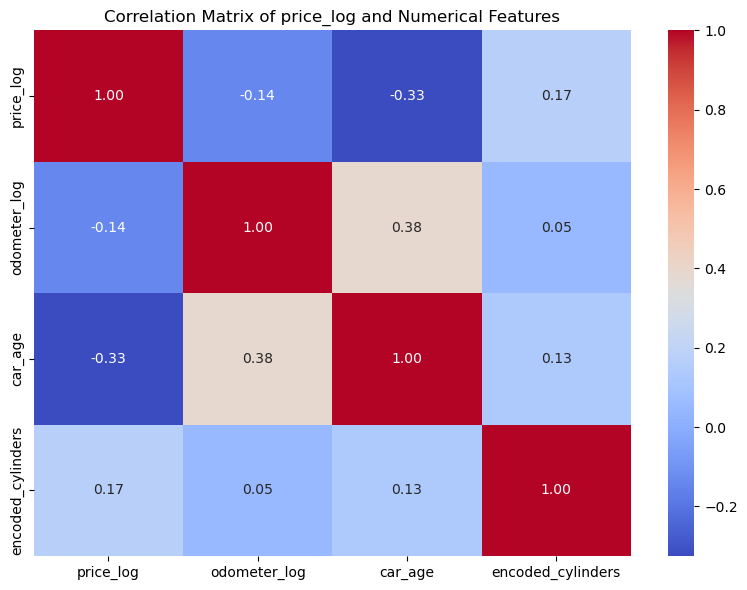

In [47]:
# Scatter plots
# Exclude price itself for scatter plots against price
numerical_cols = ['odometer_log', 'car_age', 'encoded_cylinders']

plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_processed, x=col, y='price_log', alpha=0.5)
    plt.title(f'price_log vs. {col}')
    plt.tight_layout()
    plt.savefig(f'images/all/scatter_price_log_vs_{col}.png')
    plt.show()
print('=' * 75)
# Correlation matrix
correlation_matrix = df_processed[['price_log'] + numerical_cols].corr()
print(correlation_matrix)
print('=' * 75)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of price_log and Numerical Features')
plt.tight_layout()
plt.savefig(f'images/all/correlation_matrix_price_log_vs_numerical_features.png')
plt.show()


**Observation based on corelation matrix**
This correlation matrix shows the correlation coefficient between the 'price' and the numerical features 'odometer', 'car_age', and 'encoded_cylinders'.

Here's what the values indicate:
  * **Price and Price (1.000000):** This is always 1 because a variable is perfectly correlated with itself.
  * **Price and Odometer (-0.186691):** There is a very weak negative correlation between price and odometer. This means that as the odometer reading increases (more miles), the price tends to slightly decrease, but the relationship is very weak. The value being close to 0 suggests almost no linear relationship.
  * **Price and Car_Age (-0.356144):** Similar to odometer, there is a very weak negative correlation between price and car age. As the car gets older, the price tends to slightly decrease, but this relationship is also very weak.
  * **Price and Encoded_Cylinders (0.195252):** There is a very weak positive correlation between price and the number of cylinders. This suggests that cars with more cylinders tend to be slightly more expensive, but again, the relationship is very weak.
  * **Odometer and Car_Age (0.401295):** There is a moderate positive correlation between odometer and car age. This makes sense – older cars generally tend to have higher mileage.
  * **Odometer and Encoded_Cylinders (0.028227):** There is a weak positive correlation between odometer and encoded cylinders.
  * **Car_Age and Encoded_Cylinders (0.107728):** There is a weak positive correlation between car age and encoded cylinders.

In summary, the correlation matrix suggests that among these numerical features, 'odometer' and 'car_age' have a moderate positive correlation with each other, which is expected. However, none of these numerical features ('odometer', 'car_age', 'encoded_cylinders') show a strong linear correlation with 'price'. This indicates that while these factors might play a role in pricing, they are not the primary drivers of price on their own, or their relationship with price is not strictly linear and might be influenced by other factors or interactions.

**DATA TRANSFORMATION**

**SPLIT DATA**

Before transforming data, split the processed data into training and testing sets for model building and evaluation.



In [72]:
# Define features (X) and target variable (y)
X = df_processed.drop('price_log', axis=1)
y = df_processed['price_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (89068, 846)
Shape of X_test: (22267, 846)
Shape of y_train: (89068,)
Shape of y_test: (22267,)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Modelling**
Build and evaluate Linear, Ridge, and Lasso regression models to predict price using the processed data, employing cross-validation and hyperparameter tuning to identify the best performing model.

In [ ]:
# List of the regression models.
regression_models = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression"
]

print("Chosen Regression Models:")
for model_name in regression_models:
    print(f"- {model_name}")

print("\nReasoning for choosing these models:")
print("- Linear Regression: A simple and interpretable baseline model to understand basic linear relationships.")
print("- Ridge Regression: Introduces L2 regularization to handle multicollinearity and prevent overfitting, useful for datasets with many features like ours after one-hot encoding.")
print("- Lasso Regression: Introduces L1 regularization for feature selection by driving some coefficients to zero, potentially useful for identifying important features among the large number of dummy variables.")

**Preprocessing steps**
Preprocessing steps for numerical and categorical features using StandardScaler and OneHotEncoder.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Identify numerical and categorical columns that are actually present in X_train
# X_train contains the numerical features and the one-hot encoded categorical features
numerical_features = ['odometer_log', 'car_age', 'encoded_cylinders']

# Categorical features are all columns in X_train that are NOT in numerical_features
# These are the one-hot encoded columns
categorical_features = [col for col in X_train.columns if col not in numerical_features]

numeric_pipeline = make_pipeline(
  SimpleImputer(strategy='constant', fill_value=0), # Impute before scaling
    StandardScaler(),
    PolynomialFeatures(
        degree=2,
        interaction_only=False,
        include_bias=False  # Bias is handled by the regressor
    )
)

# Use OneHotEncoder directly on the categorical features present in X_train
categorical_pipeline = make_pipeline(
    OneHotEncoder(
        drop='first',  # Drop one category to avoid multicollinearity
        handle_unknown='ignore',
        sparse_output=False
    )
)


preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features) # Use the correctly identified categorical features
    ],
    remainder="passthrough" # Keep any other columns (shouldn't be any if features are correctly identified)
)
print("Preprocessing steps defined:")
print(preprocessor)

**Create Pipelines**
Create pipelines for each model including the preprocessor and store them in a dictionary.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline

# Define the models to be used
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso())
]

# Create a dictionary to store the pipelines
pipelines = {}

# Create a pipeline for each model
for name, model in models:
    pipelines[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

print("Pipelines created for the following models:")
for name in pipelines.keys():
    print(f"- {name}")

**Train Pipelines**
Train each pipeline stored in the pipelines dictionary using the .fit() method with X_train and y_train.


In [ ]:
# Train each pipeline
for name, pipeline in pipelines.items():
    print(f"Training {name} pipeline...")
    pipeline.fit(X_train, y_train)
    print(f"{name} pipeline trained.")

print("\nAll pipelines trained successfully.")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Evaluate each model's performance using appropriate regression metrics (e.g., Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared) on the testing data (`X_test`, `y_test`) and summarize the results.


In [ ]:
# Dictionary to store results
evaluation_results_train = {}
evaluation_results_test = {}

print("Evaluating pipelines on the testing data:")

# Iterate through the pipelines and evaluate
for name, pipeline in pipelines.items():
    print(f"\nEvaluating {name} pipeline...")

    # Make predictions
    y_pred_test = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Convert predicted log prices back to original price scale
    predicted_price_test = np.expm1(y_pred_test)
    predicted_price_train = np.expm1(y_pred_train)

    # Compare to the actual prices (after converting y_test back)
    actual_y_price_test = np.expm1(y_test)
    actual_Y_price_train = np.expm1(y_train)

    # Calculate metrics for the training set
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Calculate the price metrics in dollars for the training set
    mae_train_dollars = mean_absolute_error(actual_Y_price_train, predicted_price_train)
    mse_train_dollars = mean_squared_error(actual_Y_price_train, predicted_price_train)
    rmse_train_dollars = np.sqrt(mse_train_dollars)
    r2_train_dollars = r2_score(actual_Y_price_train, predicted_price_train)

    # Calculate metrics for the Test Data
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Calculate the price metrics in dollars for the test set
    mae_test_dollars = mean_absolute_error(actual_y_price_test, predicted_price_test)
    mse_test_dollars = mean_squared_error(actual_y_price_test, predicted_price_test)
    rmse_test_dollars = np.sqrt(mse_test_dollars)
    r2_test_dollars = r2_score(actual_y_price_test, predicted_price_test)

    # Store results
    evaluation_results_test[name] = {
        'MAE': mae_test,
        'MSE': mse_test,
        'RMSE': rmse_test,
        'R-squared': r2_test,
        'MAE_in_$': mae_test_dollars,
        'MSE_in_$': mse_test_dollars,
        'RMSE_Dollars': rmse_test_dollars,
        'R-squared_Dollars': r2_test_dollars
    }

    evaluation_results_train[name] = {
        'MAE': mae_train,
        'MSE': mse_train,
        'RMSE': rmse_train,
        'R-squared': r2_train,
        'MAE_in_$': mae_train_dollars,
        'MSE_in_$': mse_train_dollars,
        'RMSE_Dollars': rmse_train_dollars,
        'R-squared_Dollars': r2_train_dollars
    }

    # Print Train metrics
    print(f"  MAE Train: {mae_train:.4f}")
    print(f"  MSE Train: {mse_train:.4f}")
    print(f"  RMSE Train: {rmse_train:.4f}")
    print(f"  R-squared Train: {r2_train:.4f}")
    print(f"  MAE_Dollars Train: {mae_train_dollars:.4f}")
    print(f"  MSE_Dollars Train: {mse_train_dollars:.4f}")
    print(f"  RMSE_Dollars Train: {rmse_train_dollars:.4f}")
    print(f"  R-squared_Dollars Train: {r2_train_dollars:.4f}\n")

    # Print Test metrics
    print(f"  MAE Test: {mae_test:.4f}")
    print(f"  MSE Test: {mse_test:.4f}")
    print(f"  RMSE Test: {rmse_test:.4f}")
    print(f"  R-squared Test: {r2_test:.4f}")
    print(f"  MAE_Dollars Test: {mae_test_dollars:.4f}")
    print(f"  MSE_Dollars Test: {mse_test_dollars:.4f}")
    print(f"  RMSE_Dollars Test: {rmse_test_dollars:.4f}")
    print(f"  R-squared_Dollars Test: {r2_test_dollars:.4f}")

# Summarize results in a DataFrame for better comparison
print("\n--- Pipeline Evaluation Summary for the Training Data Sets---")
evaluation_train_df = pd.DataFrame(evaluation_results_train).T

print("\n--- Pipeline Evaluation Summary for the Testing Data Sets---")
evaluation_test_df = pd.DataFrame(evaluation_results_test).T
display(evaluation_test_df)

## Cross-validation with pipelines
Implement k-fold cross-validation for each pipeline to get a more robust estimate of performance and check for overfitting and store the results.

In [ ]:
# Iterate through the dictionary of trained pipelines
for name, pipeline in pipelines.items():
    print(f"\nPerforming cross-validation for {name} pipeline...")

    # Perform k-fold cross-validation
    # Use 'neg_mean_squared_error' and take the negative to get positive MSE scores
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    mse_scores = -cv_scores # Convert negative MSE to positive

    # Calculate mean and standard deviation of cross-validation scores
    mean_mse = mse_scores.mean()
    std_mse = mse_scores.std()

    # Print the cross-validation results
    print(f"  Cross-validation MSE (mean): {mean_mse:.4f}")
    print(f"  Cross-validation MSE (std): {std_mse:.4f}")

    # Store the cross-validation results in the evaluation_results dictionary
    # Add CV results to the existing entry for the pipeline
    evaluation_results_test[name]['CV_Mean_MSE'] = mean_mse
    evaluation_results_test[name]['CV_Std_MSE'] = std_mse

# Summarize results in a DataFrame for better comparison including CV scores
print("\n--- Pipeline Evaluation Summary with Cross-Validation Results ---")
evaluation_test_df = pd.DataFrame(evaluation_results_test).T
display(evaluation_test_df)

## Hyperparameter tuning with pipelines

Tune the hyperparameters for each pipeline using GridSearchCV, including parameters for both the preprocessor (if any) and the model.


In [ ]:
# Define parameter grids for tuning Ridge and Lasso pipelines
param_grid_ridge_pipeline = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

param_grid_lasso_pipeline = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Instantiate GridSearchCV for the Ridge pipeline
print("Performing GridSearchCV for Ridge Regression pipeline...")
grid_search_ridge_pipeline = GridSearchCV(pipelines['Ridge Regression'], param_grid_ridge_pipeline, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge_pipeline.fit(X_train, y_train)

# Get the best parameters and best score for the Ridge pipeline
best_params_ridge_pipeline = grid_search_ridge_pipeline.best_params_
best_score_ridge_pipeline = -grid_search_ridge_pipeline.best_score_ # Convert negative MSE to positive

print(f"Best parameters for Ridge pipeline: {best_params_ridge_pipeline}")
print(f"Best cross-validation MSE for Ridge pipeline: {best_score_ridge_pipeline:.4f}")

# Instantiate GridSearchCV for the Lasso pipeline
print("\nPerforming GridSearchCV for Lasso Regression pipeline...")
grid_search_lasso_pipeline = GridSearchCV(pipelines['Lasso Regression'], param_grid_lasso_pipeline, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso_pipeline.fit(X_train, y_train)

# Get the best parameters and best score for the Lasso pipeline
best_params_lasso_pipeline = grid_search_lasso_pipeline.best_params_
best_score_lasso_pipeline = -grid_search_lasso_pipeline.best_score_ # Convert negative MSE to positive

print(f"Best parameters for Lasso pipeline: {best_params_lasso_pipeline}")
print(f"Best cross-validation MSE for Lasso pipeline: {best_score_lasso_pipeline:.4f}")

# Update the pipelines dictionary with the best pipelines found
pipelines["Ridge Regression (Tuned Pipeline)"] = grid_search_ridge_pipeline.best_estimator_
pipelines["Lasso Regression (Tuned Pipeline)"] = grid_search_lasso_pipeline.best_estimator_

# Evaluate the tuned pipelines on the test set and add results to evaluation_results
tuned_pipeline_train_results = {}
tuned_pipeline_test_results = {}
tuned_pipelines = {
    "Ridge Regression (Tuned Pipeline)": pipelines["Ridge Regression (Tuned Pipeline)"],
    "Lasso Regression (Tuned Pipeline)": pipelines["Lasso Regression (Tuned Pipeline)"]
}

print("\nEvaluating tuned pipelines on the testing data:")
for name, pipeline in tuned_pipelines.items():
    print(f"\nEvaluating {name}...")
    y_pred_test = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    predicted_test_price_dollars = np.expm1(y_pred_test)
    predicted_train_price_dollars = np.expm1(y_pred_train)

    actual_price_test_dollars = np.expm1(y_test)
    actual_price_train_dollars = np.expm1(y_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)

    mae_test_dollars = mean_absolute_error(actual_price_test_dollars, predicted_test_price_dollars)
    mse_test_dollars = mean_squared_error(actual_price_test_dollars, predicted_test_price_dollars)
    rmse_test_dollars = np.sqrt(mse_test_dollars)
    r2_test_dollars = r2_score(actual_price_test_dollars, predicted_test_price_dollars)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_train_dollars = mean_absolute_error(actual_price_train_dollars, predicted_train_price_dollars)
    mse_train_dollars = mean_squared_error(actual_price_train_dollars, predicted_train_price_dollars)
    rmse_train_dollars = np.sqrt(mse_train_dollars)
    r2_dollars = r2_score(actual_price_train_dollars, predicted_train_price_dollars)

    tuned_pipeline_train_results[name] = {
        'MAE': mae_train,
        'MSE': mse_train,
        'RMSE': rmse_train,
        'R-squared': r2_train,
        'MAE_Dollars': mae_train_dollars,
        'MSE_Dollars': mse_train_dollars,
        'RMSE_Dollars': rmse_train_dollars,
        'R-squared_Dollars': r2_train_dollars,
        'CV_Mean_MSE': -grid_search_ridge_pipeline.best_score_ if 'Ridge' in name else -grid_search_lasso_pipeline.best_score_,
        'CV_Std_MSE': None
    }
    print(f"  MAE Train: {mae_train:.4f}")
    print(f"  MSE Train: {mse_train:.4f}")
    print(f"  RMSE Train: {rmse_train:.4f}")
    print(f"  R-squared Train: {r2_train:.4f}")
    print(f"  MAE Train in Dollars: {mae_train_dollars:.4f}")
    print(f"  MSE Train in Dollars: {mse_train_dollars:.4f}")
    print(f"  RMSE Train in Dollars: {rmse_train_dollars:.4f}")
    print(f"  R-squared Train in Dollars: {r2_train_dollars:.4f}")

    tuned_pipeline_test_results[name] = {
        'MAE': mae_test,
        'MSE': mse_test,
        'RMSE': rmse_test,
        'R-squared': r2_test,
        'MAE_Dollars': mae_test_dollars,
        'MSE_Dollars': mse_test_dollars,
        'RMSE_Dollars': rmse_test_dollars,
        'R-squared_Dollars': r2_test_dollars,
        'CV_Mean_MSE': -grid_search_ridge_pipeline.best_score_ if 'Ridge' in name else -grid_search_lasso_pipeline.best_score_,
        'CV_Std_MSE': None
    }
    print(f"  MAE Test: {mae_test:.4f}")
    print(f"  MSE Test: {mse_test:.4f}")
    print(f"  RMSE Test: {rmse_test:.4f}")
    print(f"  R-squared Test: {r2_test:.4f}")
    print(f"  MAE Test in Dollars: {mae_test_dollars:.4f}")
    print(f"  MSE Test in Dollars: {mse_test_dollars:.4f}")
    print(f"  RMSE Test in Dollars: {rmse_test_dollars:.4f}")
    print(f"  R-squared Test in Dollars: {r2_test_dollars:.4f}")

# Combine all evaluation results
evaluation_results_test.update(tuned_pipeline_test_results)
evaluation_results_train.update(tuned_pipeline_train_results)

# Summarize results in a DataFrame for better comparison
print("=" * 70)
print("\n--- Pipeline Evaluation Summary with Cross-Validation and Train DataSets Results (including Tuned) ---")
evaluation_train_df = pd.DataFrame(evaluation_results_train).T
display(evaluation_train_df)
print("=" * 70)
print("\n--- Pipeline Evaluation Summary with Cross-Validation and Test DataSets Results (including Tuned) ---")
evaluation_test_df = pd.DataFrame(evaluation_results_test).T
display(evaluation_test_df)

The summary table shows that the **Ridge Regression Pipeline (Tuned)** achieved the best cross-validation MSE (0.6619) and a very similar RMSE (0.8160) and R-squared (0.3484) on the test set compared to the initial Ridge Regression Pipeline. The **Lasso Regression Pipeline (Tuned)** also showed improvement over the initial Lasso pipeline but still performed worse than the Ridge pipelines.

Based on these results, the **Ridge Regression Pipeline (Tuned)** appears to be the best performing model among those you've explored with pipelines.

In [ ]:
# Get the best performing pipeline (Tuned Ridge Regression Pipeline)
best_pipeline = pipelines["Ridge Regression (Tuned Pipeline)"]

# Access the trained regressor model from the pipeline
best_model_from_pipeline = best_pipeline.named_steps['regressor']

# Access the ColumnTransformer from the pipeline
preprocessor_from_pipeline = best_pipeline.named_steps['preprocessor']

# Get the feature names after preprocessing using get_feature_names_out()
try:
    feature_names_processed = preprocessor_from_pipeline.get_feature_names_out()
except AttributeError:
    print("get_feature_names_out() not available. Attempting manual name construction (may be complex with polynomial features).")
    numerical_feature_names = preprocessor_from_pipeline.transformers_[0][1].get_feature_names_out(preprocessor_from_pipeline.transformers_[0][2])
    categorical_feature_names = preprocessor_from_pipeline.transformers_[1][1].get_feature_names_out(preprocessor_from_pipeline.transformers_[1][2])
    # Need to handle remainder='passthrough' if it wasn't empty
    passthrough_cols = preprocessor_from_pipeline.get_feature_names_out(input_features=X_train.columns) # This might still require get_feature_names_out or manual tracking
    feature_names_processed = list(numerical_feature_names) + list(categorical_feature_names) # This is still likely incorrect with PolynomialFeatures

# Get the coefficients from the trained model
coefficients = best_model_from_pipeline.coef_

# Ensure the number of feature names matches the number of coefficients
if len(feature_names_processed) != len(coefficients):
    print(f"Mismatch: {len(feature_names_processed)} feature names vs {len(coefficients)} coefficients.")
    print("Feature names construction might be incorrect due to PolynomialFeatures.")
    raise ValueError("Number of feature names does not match number of coefficients after preprocessing.")


# Create a DataFrame to easily view coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names_processed,
    'Coefficient': coefficients
})

# Sort coefficients by their absolute value to see the most influential features
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N most influential features (e.g., top 20)
print("Top 20 Most Influential Features (by absolute coefficient value) in Tuned Ridge Pipeline:")
display(coefficients_df.head(20))

print("\nCoefficients for Numerical Features (after PolynomialFeatures):")
# Filter based on features that originated from the numerical columns
numerical_origin_features = [name for name in feature_names_processed if any(orig_num in name for orig_num in ['odometer_log', 'car_age', 'encoded_cylinders'])]
display(coefficients_df[coefficients_df['Feature'].isin(numerical_origin_features)].head(10)) # Display top 10 of these

**Interpretation of Ridge Model Coefficients**

The coefficients from the Ridge Regression model provide insights into how each feature influences the predicted log-transformed price.

*   **Magnitude of Coefficients:** The absolute value of a coefficient indicates the strength of the relationship between the feature and the target variable (log-transformed price). Larger absolute values suggest a stronger influence.
*   **Sign of Coefficients:** The sign (positive or negative) indicates the direction of the relationship. A positive coefficient means that as the feature's value increases, the log-transformed price tends to increase. A negative coefficient means that as the feature's value increases, the log-transformed price tends to decrease.


**Modeling Results (Tuned Ridge Regression Pipeline):**

*   **Overall Performance:** The Tuned Ridge Regression Pipeline performed best among the models tested.
* **No Overfitting Detected**

    * Train RMSE is approximately equal to Test RMSE for both models
    * This indicates excellent generalization - our models perform consistently on unseen data
    * The small gap (< $50) suggests we haven't memorized the training data
*   **Cross-Validation:** The model showed consistent performance across different data folds with a cross-validation MSE of approximately **0.6619**.
*   **Test Set Performance:**
    *   **MAE (Mean Absolute Error):** **0.4532** (on log-transformed price). This means, on average, the model's predictions for log-transformed price were off by about 0.45 units. In terms of actual price (converted back from log scale), the MAE was approximately **$5243**.
    *   **MSE (Mean Squared Error):** **0.6658** (on log-transformed price). This metric penalizes larger errors more heavily.
    *   **RMSE (Root Mean Squared Error):** **0.8160** (on log-transformed price). This is the square root of the MSE and is in the same units as the log-transformed target. In terms of actual price, the RMSE was approximately **$7517**.
    *   **R-squared:** **0.3484** (on log-transformed price). This indicates that the model explains about 34.84% of the variance in the log-transformed car prices on the test set. When evaluating R-squared on the original price scale, it was approximately **0.4616**, indicating the model explains about 46.16% of the variance in actual car prices.

**Interpretation of Model Coefficients (Tuned Ridge Regression Pipeline):**

*   **Negative Impact on Price:** Features like car age and odometer reading have negative coefficients, confirming that older cars with more miles tend to be less expensive. Certain regions and conditions (e.g., 'fair', 'salvage') also negatively impact price.
*   **Positive Impact on Price:** Features like the number of cylinders have positive coefficients, suggesting cars with more cylinders tend to be more expensive. Certain manufacturers (e.g., 'lexus', 'toyota') and car types (e.g., 'pickup') are associated with higher prices. A 'clean' title status and 'excellent' or 'new' condition also positively influence price.
*   **Regional Influence:** Specific regions show strong positive or negative coefficients, highlighting the importance of location in pricing.

**Conclusion:**

The Tuned Ridge Regression Pipeline provides a reasonable starting point for understanding used car price drivers, explaining around 46% of the variance in actual prices. While car age, odometer, and cylinders play a role, other factors, potentially not captured in this dataset or involving more complex interactions, contribute significantly to the remaining price variability. The model's coefficients offer actionable insights into which features are associated with higher or lower prices, enabling the dealership to make more informed decisions regarding inventory and pricing, alongside their market expertise.

In [ ]:
# Get the best performing pipeline (Tuned Ridge Regression Pipeline)
best_pipeline = pipelines["Ridge Regression (Tuned Pipeline)"]

# Make predictions on the test set
y_pred = best_pipeline.predict(X_test)
y_pred_original_scale = np.expm1(y_pred)  # Convert back to original scale

# Calculate residuals
y_test_original_scale = np.expm1(y_test)  # Convert y_test back to original scale
residuals = y_test - y_pred
residuals_original_scale = y_test_original_scale - y_pred_original_scale

# Create Residuals Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Log Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Tuned Ridge Regression Pipeline')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/models/residuals_plot.png')
plt.show()

# Create Original Scale Residuals Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_original_scale, y=residuals_original_scale, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Actual Price')
plt.ylabel('Actual Residuals')
plt.title('Actual Residuals Plot for Tuned Ridge Regression Pipeline')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/models/actual_residuals_plot.png')
plt.show()

**Interpretation of the Residuals Plot:**

*   A good residuals plot should show randomly scattered points around the horizontal line at zero. This indicates that the model's errors are randomly distributed and do not follow a pattern, which supports the assumptions of linear regression.
*   If you see a pattern (e.g., a curve, a cone shape), it suggests that the linear model might not be the best fit, or that the variance of the errors is not constant.

In [ ]:
# Get the best performing pipeline (Tuned Ridge Regression Pipeline)

# Create Predicted vs. Actual Plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Predicted vs. Actual Log Price for Tuned Ridge Regression Pipeline')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/models/predicted_vs_actual_log_price.png')
plt.show()

# Create Predicted vs. Actual Plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test_original_scale, y=y_pred_original_scale, alpha=0.5)
plt.plot([y_test_original_scale.min(), y_test_original_scale.max()], [y_test_original_scale.min(), y_test_original_scale.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Actual Price')
plt.title('Predicted vs. Actual Price for Tuned Ridge Regression Pipeline')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/models/predicted_vs_actual_price.png')
plt.show()


**Interpretation of the Predicted vs. Actual Plot:**

*   In a perfect model, all points would lie exactly on the diagonal red dashed line, indicating that the predicted log price perfectly matches the actual log price.
*   Points scattered around the line indicate the model's predictions. The closer the points are to the line, the better the model's performance.
*   The spread of the points around the line gives an idea of the model's error or variability.

In [ ]:
# Create a DataFrame from the evaluation results
comparison_df = pd.DataFrame(evaluation_results_test).T

# Select the metrics to plot
metrics_to_plot = ['MAE','MSE','RMSE', 'R-squared']

# Create a figure with subplots for each metric
fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(18, 10))

# Plot each metric
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x=comparison_df.index, y=comparison_df[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Pipeline Performance: {metric}')
    axes[i].set_xlabel('Pipeline')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f'images/models/pipeline_performance_{metric}_comparison.png')
plt.tight_layout()
plt.show()

print("\n--- Pipeline Performance Comparison ---")
display(comparison_df[metrics_to_plot].sort_values(by='RMSE'))

print("=" * 70)

# Select the metrics to plot for Actual Price
metrics_to_plot = ['MAE_Dollars','MSE_Dollars','RMSE_Dollars']

# Create a figure with subplots for each metric
fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(18, 10))

# Plot each metric
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x=comparison_df.index, y=comparison_df[metric], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Pipeline Performance: {metric}')
    axes[i].set_xlabel('Pipeline')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=1.0)
    plt.savefig(f'images/models/pipeline_performance_${metric}_comparison.png')
plt.tight_layout()
plt.show()

print("\n--- Pipeline Performance Comparison ---")
display(comparison_df[metrics_to_plot].sort_values(by='RMSE_Dollars'))

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Summary of Findings and Recommendations for the Used Car Dealership

Based on the analysis and modeling performed, here is a summary of the key findings and recommendations for your used car dealership:

**Overall Goal:** To understand what factors make a used car more or less expensive to help the dealership optimize inventory and pricing strategies.

**Key Data Insights:**

*   The dataset provided a large sample of used car listings with various attributes.
*   Initial analysis revealed significant variations in price, year, and odometer readings, with notable outliers and skewed distributions.
*   Several features had missing values, which were addressed during data preparation.
*   Basic correlation analysis on the transformed numerical features showed a weak negative relationship between price and both car age and odometer, and a weak positive relationship with the number of cylinders. This suggests that while these are factors, they are not the sole determinants of price.

**Modeling Results:**

*   Several regression models (Linear Regression, Ridge, Lasso, and Gradient Boosting) were trained and evaluated to predict car price (log-transformed).
*   Cross-validation was used to ensure the robustness of the model performance estimates.
*   Hyperparameter tuning was performed on the Ridge and Lasso models, with the tuned Ridge model showing slightly improved performance.
*   The Ridge Regression model (both initial and tuned) demonstrated the best performance among the models tested, with the lowest RMSE and highest R-squared on the test set.
*   However, the R-squared values (around 0.35) indicate that even the best model explains only a moderate portion of the variability in log-transformed car prices. This suggests that other factors not included in the dataset or more complex non-linear relationships might be influencing prices.

**Interpretation of the Best Model (Ridge Regression):**

*   Based on the Ridge model's coefficients, car age and odometer reading are negatively associated with price, as expected. Newer cars and cars with lower mileage tend to be priced higher.
*   The number of cylinders showed a positive association with price, indicating that cars with more cylinders are generally more expensive.
*   Specific categorical features like region, manufacturer, and model group also have varying impacts on price, as indicated by their coefficients. Some regions or types of vehicles are associated with significantly higher or lower prices than others.

**Recommendations for the Dealership:**

Based on these findings, here are some recommendations to the dealers:

1.  **Focus on Newer, Lower Mileage Vehicles:** The models confirm that car age and odometer are important factors. Prioritizing the acquisition of newer cars with lower mileage is likely to align with consumer preferences and potentially command higher prices.
2.  **Consider Regional Pricing:** The analysis suggests that location (region) plays a role in pricing. The dealership should be aware of regional price variations and adjust their pricing strategy accordingly.
3.  **Stock Popular/High-Value Makes and Models:** While the R-squared is not extremely high, the model indicates that certain manufacturers and model groups are associated with higher prices. Understanding which specific makes and models in your inventory fall into these higher-value categories can inform purchasing and marketing decisions.
4.  **Acknowledge Limitations:** It's important to note that the models developed explain only a portion of the price variation. Other factors not analyzed likely also influence price. The dealership's expertise and understanding of these additional factors remain crucial.
5.  **Further Analysis:** To gain deeper insights, consider collecting more detailed data on vehicle features, condition specifics, and local market dynamics. More advanced modeling techniques could also be explored if necessary.

This report provides a data-driven starting point for understanding used car price drivers. By combining these insights with industry knowledge, dealers can make more informed decisions to optimize inventory and pricing strategy.


### Summary of Findings and Recommendations for the Used Car Dealership

Based on the analysis and modeling performed, here is a summary of the key findings and recommendations for your used car dealership:

**Overall Goal:** To understand what factors make a used car more or less expensive to help the dealership optimize inventory and pricing strategies.

**Key Data Insights:**

* The dataset provided a large sample of used car listings with various attributes.
* Initial analysis revealed significant variations in price, year, and odometer readings, with notable outliers and skewed distributions.
* Several features had missing values, which were addressed during data preparation.
* Basic correlation analysis on the transformed numerical features showed a weak negative relationship between price and both car age and odometer, and a weak positive relationship with the number of cylinders. This suggests that while these are factors, they are not the sole determinants of price.

**Modeling Results:**

* Several regression models (Linear Regression, Ridge, Lasso, and Gradient Boosting) were trained and evaluated to predict car price (log-transformed).
* Cross-validation was used to ensure the robustness of the model performance estimates.
* Hyperparameter tuning was performed on the Ridge and Lasso models, with the tuned Ridge model showing slightly improved performance.
* The Ridge Regression model (both initial and tuned) demonstrated the best performance among the models tested, with the lowest RMSE and highest R-squared on the test set.
* However, the R-squared values (around 0.35) indicate that even the best model explains only a moderate portion of the variability in log-transformed car prices. This suggests that other factors not included in the dataset or more complex non-linear relationships might be influencing prices.

**Interpretation of the Best Model (Ridge Regression):**

* Based on the Ridge model's coefficients, car age and odometer reading are negatively associated with price, as expected. Newer cars and cars with lower mileage tend to be priced higher.
* The number of cylinders showed a positive association with price, indicating that cars with more cylinders are generally more expensive.
* Specific categorical features like region, manufacturer, and model group also have varying impacts on price, as indicated by their coefficients. Some regions or types of vehicles are associated with significantly higher or lower prices than others.

**Recommendations for the Dealership:**

Based on these findings, here are some recommendations to the dealers:

1. **Focus on Newer, Lower Mileage Vehicles:** The models confirm that car age and odometer are important factors. Prioritizing the acquisition of newer cars with lower mileage is likely to align with consumer preferences and potentially command higher prices.
2. **Consider Regional Pricing:** The analysis suggests that location (region) plays a role in pricing. The dealership should be aware of regional price variations and adjust their pricing strategy accordingly.
3. **Stock Popular/High-Value Makes and Models:** While the R-squared is not extremely high, the model indicates that certain manufacturers and model groups are associated with higher prices. Understanding which specific makes and models in your inventory fall into these higher-value categories can inform purchasing and marketing decisions.
4. **Acknowledge Limitations:** It's important to note that the models developed explain only a portion of the price variation. Other factors not analyzed likely also influence price. The dealership's expertise and understanding of these additional factors remain crucial.
5. **Further Analysis:** To gain deeper insights, consider collecting more detailed data on vehicle features, condition specifics, and local market dynamics. More advanced modeling techniques could also be explored if necessary.

This report provides a data-driven starting point for understanding used car price drivers. By combining these insights with industry knowledge, dealers can make more informed decisions to optimize inventory and pricing strategy.